In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets,transforms

In [0]:
transform=transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=True,transform=transform)
testset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=False,transform=transform)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

Processing...
Done!


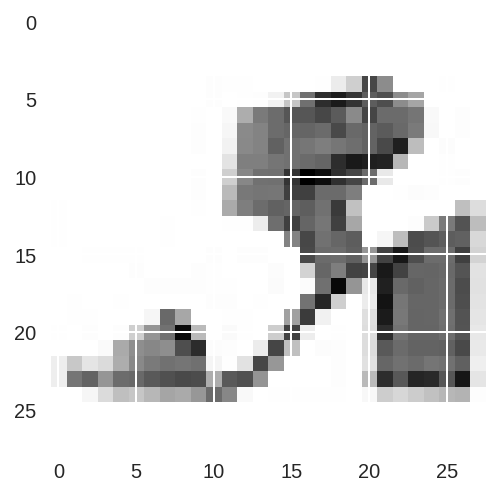

In [0]:
images,labels=next(iter(trainloader))
x=images[11,:].numpy().squeeze()
plt.imshow(x)

In [0]:
class Classifier(nn.Module):
  
  def __init__(self,drop_prob):
    super().__init__()
    self.fc1=nn.Linear(784,256)
    self.fc2=nn.Linear(256,128)
    self.fc3=nn.Linear(128,64)
    self.fc4=nn.Linear(256,64)
    self.fc5=nn.Linear(64,10)
    
    
    self.dropout=nn.Dropout(p=drop_prob)
    
  def forward(self,x,l):
    x=x.view(x.shape[0],-1)
    
    if(l==3):
      x=self.dropout(F.relu(self.fc1(x)))
      x=self.dropout(F.relu(self.fc4(x)))
    if(l==4):
      x=self.dropout(F.relu(self.fc1(x)))
      x=self.dropout(F.relu(self.fc2(x)))
      x=self.dropout(F.relu(self.fc3(x)))
    x=F.log_softmax(self.fc5(x),dim=1)
    
    return x

In [0]:
data=pd.DataFrame(columns=['Learning_rate','No_of_layer','Dropout_val','Epoch1','Epoch2','Epoch3','Epoch4','Epoch5','Epoch6','Epoch7','Epoch8','Epoch9','Epoch10','Mean_accuracy'],index=range(28))

-------------------For Learning rate:0.001 ,No of layers:3 ,Dropout value:0.2--------------------
Epoch: 1/10..  Training Loss: 0.571..  Test Loss: 0.441..  Test Accuracy: 0.841
Epoch: 2/10..  Training Loss: 0.423..  Test Loss: 0.412..  Test Accuracy: 0.850
Epoch: 3/10..  Training Loss: 0.388..  Test Loss: 0.373..  Test Accuracy: 0.863
Epoch: 4/10..  Training Loss: 0.363..  Test Loss: 0.377..  Test Accuracy: 0.862
Epoch: 5/10..  Training Loss: 0.346..  Test Loss: 0.355..  Test Accuracy: 0.871
Epoch: 6/10..  Training Loss: 0.333..  Test Loss: 0.357..  Test Accuracy: 0.870
Epoch: 7/10..  Training Loss: 0.323..  Test Loss: 0.355..  Test Accuracy: 0.874
Epoch: 8/10..  Training Loss: 0.313..  Test Loss: 0.349..  Test Accuracy: 0.875
Epoch: 9/10..  Training Loss: 0.303..  Test Loss: 0.356..  Test Accuracy: 0.877
Epoch: 10/10..  Training Loss: 0.298..  Test Loss: 0.332..  Test Accuracy: 0.880


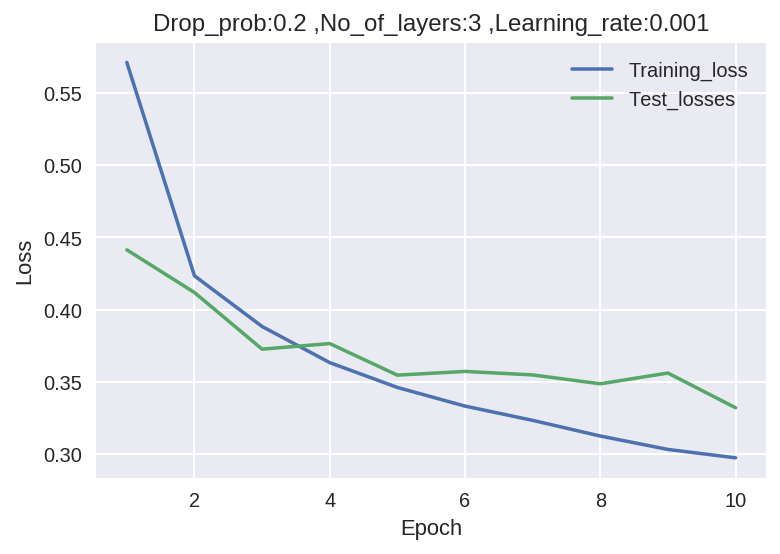

-------------------For Learning rate:0.001 ,No of layers:3 ,Dropout value:0.5--------------------
Epoch: 1/10..  Training Loss: 0.711..  Test Loss: 0.473..  Test Accuracy: 0.829
Epoch: 2/10..  Training Loss: 0.538..  Test Loss: 0.438..  Test Accuracy: 0.841
Epoch: 3/10..  Training Loss: 0.498..  Test Loss: 0.423..  Test Accuracy: 0.846
Epoch: 4/10..  Training Loss: 0.479..  Test Loss: 0.412..  Test Accuracy: 0.848
Epoch: 5/10..  Training Loss: 0.462..  Test Loss: 0.401..  Test Accuracy: 0.858
Epoch: 6/10..  Training Loss: 0.445..  Test Loss: 0.395..  Test Accuracy: 0.860
Epoch: 7/10..  Training Loss: 0.434..  Test Loss: 0.394..  Test Accuracy: 0.858
Epoch: 8/10..  Training Loss: 0.429..  Test Loss: 0.394..  Test Accuracy: 0.860
Epoch: 9/10..  Training Loss: 0.421..  Test Loss: 0.385..  Test Accuracy: 0.863
Epoch: 10/10..  Training Loss: 0.416..  Test Loss: 0.372..  Test Accuracy: 0.867


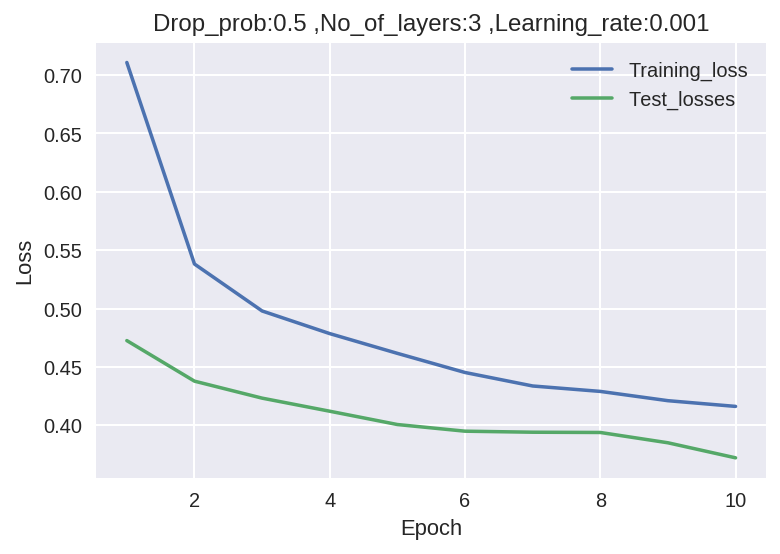

-------------------For Learning rate:0.001 ,No of layers:4 ,Dropout value:0.2--------------------
Epoch: 1/10..  Training Loss: 0.597..  Test Loss: 0.452..  Test Accuracy: 0.837
Epoch: 2/10..  Training Loss: 0.436..  Test Loss: 0.401..  Test Accuracy: 0.852
Epoch: 3/10..  Training Loss: 0.396..  Test Loss: 0.386..  Test Accuracy: 0.860
Epoch: 4/10..  Training Loss: 0.373..  Test Loss: 0.379..  Test Accuracy: 0.865
Epoch: 5/10..  Training Loss: 0.353..  Test Loss: 0.361..  Test Accuracy: 0.871
Epoch: 6/10..  Training Loss: 0.340..  Test Loss: 0.359..  Test Accuracy: 0.872
Epoch: 7/10..  Training Loss: 0.330..  Test Loss: 0.371..  Test Accuracy: 0.871
Epoch: 8/10..  Training Loss: 0.321..  Test Loss: 0.367..  Test Accuracy: 0.873
Epoch: 9/10..  Training Loss: 0.311..  Test Loss: 0.347..  Test Accuracy: 0.878
Epoch: 10/10..  Training Loss: 0.303..  Test Loss: 0.335..  Test Accuracy: 0.882


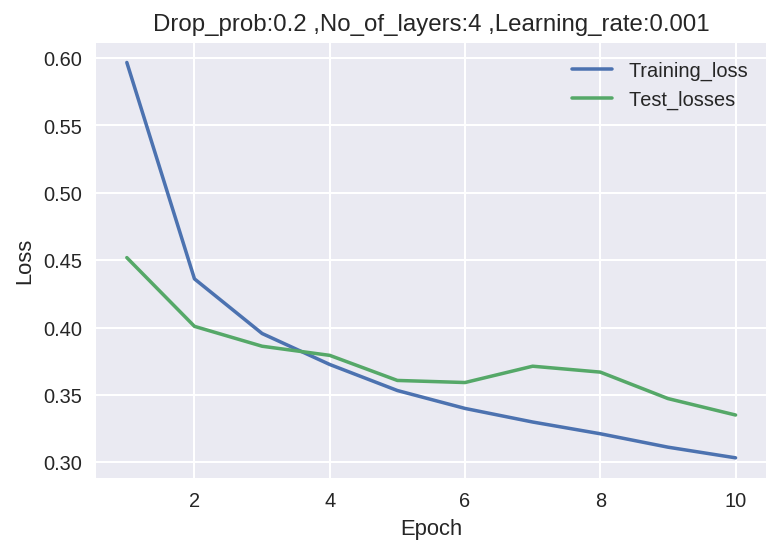

-------------------For Learning rate:0.001 ,No of layers:4 ,Dropout value:0.5--------------------
Epoch: 1/10..  Training Loss: 0.823..  Test Loss: 0.514..  Test Accuracy: 0.812
Epoch: 2/10..  Training Loss: 0.592..  Test Loss: 0.458..  Test Accuracy: 0.833
Epoch: 3/10..  Training Loss: 0.547..  Test Loss: 0.429..  Test Accuracy: 0.844
Epoch: 4/10..  Training Loss: 0.518..  Test Loss: 0.431..  Test Accuracy: 0.839
Epoch: 5/10..  Training Loss: 0.495..  Test Loss: 0.412..  Test Accuracy: 0.850
Epoch: 6/10..  Training Loss: 0.479..  Test Loss: 0.411..  Test Accuracy: 0.850
Epoch: 7/10..  Training Loss: 0.471..  Test Loss: 0.401..  Test Accuracy: 0.852
Epoch: 8/10..  Training Loss: 0.457..  Test Loss: 0.390..  Test Accuracy: 0.858
Epoch: 9/10..  Training Loss: 0.457..  Test Loss: 0.378..  Test Accuracy: 0.860
Epoch: 10/10..  Training Loss: 0.451..  Test Loss: 0.393..  Test Accuracy: 0.855


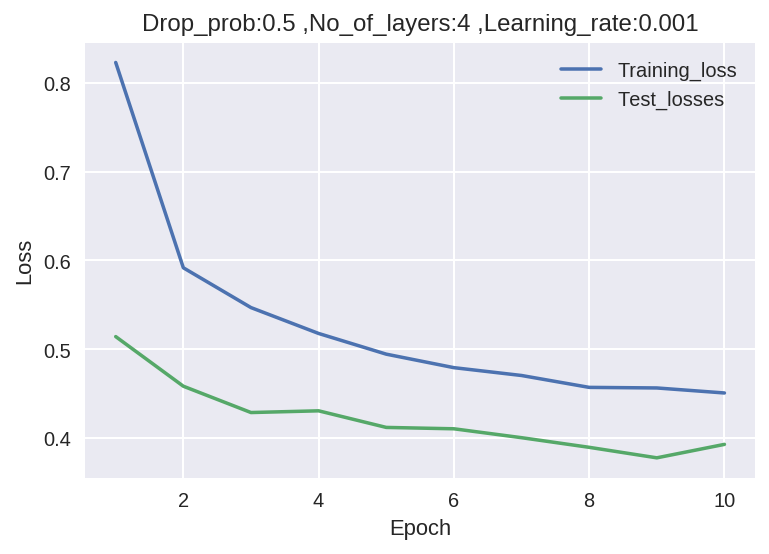

-------------------For Learning rate:0.003 ,No of layers:3 ,Dropout value:0.2--------------------
Epoch: 1/10..  Training Loss: 0.562..  Test Loss: 0.462..  Test Accuracy: 0.834
Epoch: 2/10..  Training Loss: 0.455..  Test Loss: 0.421..  Test Accuracy: 0.851
Epoch: 3/10..  Training Loss: 0.427..  Test Loss: 0.442..  Test Accuracy: 0.842
Epoch: 4/10..  Training Loss: 0.413..  Test Loss: 0.407..  Test Accuracy: 0.856
Epoch: 5/10..  Training Loss: 0.395..  Test Loss: 0.397..  Test Accuracy: 0.859
Epoch: 6/10..  Training Loss: 0.384..  Test Loss: 0.392..  Test Accuracy: 0.857
Epoch: 7/10..  Training Loss: 0.378..  Test Loss: 0.407..  Test Accuracy: 0.855
Epoch: 8/10..  Training Loss: 0.370..  Test Loss: 0.382..  Test Accuracy: 0.864
Epoch: 9/10..  Training Loss: 0.361..  Test Loss: 0.367..  Test Accuracy: 0.870
Epoch: 10/10..  Training Loss: 0.361..  Test Loss: 0.372..  Test Accuracy: 0.875


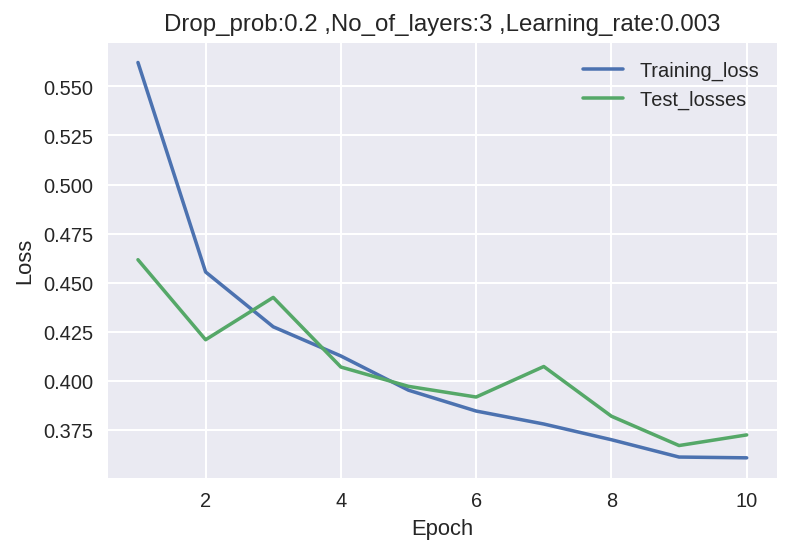

-------------------For Learning rate:0.003 ,No of layers:3 ,Dropout value:0.5--------------------
Epoch: 1/10..  Training Loss: 0.749..  Test Loss: 0.505..  Test Accuracy: 0.815
Epoch: 2/10..  Training Loss: 0.620..  Test Loss: 0.479..  Test Accuracy: 0.826
Epoch: 3/10..  Training Loss: 0.589..  Test Loss: 0.453..  Test Accuracy: 0.836
Epoch: 4/10..  Training Loss: 0.580..  Test Loss: 0.447..  Test Accuracy: 0.834
Epoch: 5/10..  Training Loss: 0.563..  Test Loss: 0.442..  Test Accuracy: 0.839
Epoch: 6/10..  Training Loss: 0.555..  Test Loss: 0.455..  Test Accuracy: 0.837
Epoch: 7/10..  Training Loss: 0.543..  Test Loss: 0.425..  Test Accuracy: 0.849
Epoch: 8/10..  Training Loss: 0.540..  Test Loss: 0.430..  Test Accuracy: 0.844
Epoch: 9/10..  Training Loss: 0.528..  Test Loss: 0.422..  Test Accuracy: 0.845
Epoch: 10/10..  Training Loss: 0.523..  Test Loss: 0.415..  Test Accuracy: 0.851


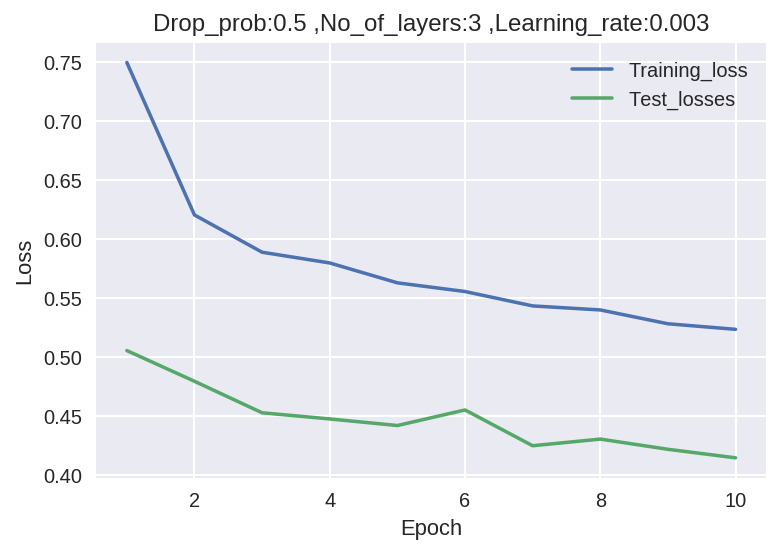

-------------------For Learning rate:0.003 ,No of layers:4 ,Dropout value:0.2--------------------
Epoch: 1/10..  Training Loss: 0.602..  Test Loss: 0.465..  Test Accuracy: 0.837
Epoch: 2/10..  Training Loss: 0.480..  Test Loss: 0.430..  Test Accuracy: 0.843
Epoch: 3/10..  Training Loss: 0.442..  Test Loss: 0.441..  Test Accuracy: 0.845
Epoch: 4/10..  Training Loss: 0.435..  Test Loss: 0.424..  Test Accuracy: 0.843
Epoch: 5/10..  Training Loss: 0.423..  Test Loss: 0.388..  Test Accuracy: 0.858
Epoch: 6/10..  Training Loss: 0.408..  Test Loss: 0.396..  Test Accuracy: 0.861
Epoch: 7/10..  Training Loss: 0.404..  Test Loss: 0.390..  Test Accuracy: 0.867
Epoch: 8/10..  Training Loss: 0.399..  Test Loss: 0.383..  Test Accuracy: 0.868
Epoch: 9/10..  Training Loss: 0.393..  Test Loss: 0.426..  Test Accuracy: 0.851
Epoch: 10/10..  Training Loss: 0.386..  Test Loss: 0.387..  Test Accuracy: 0.864


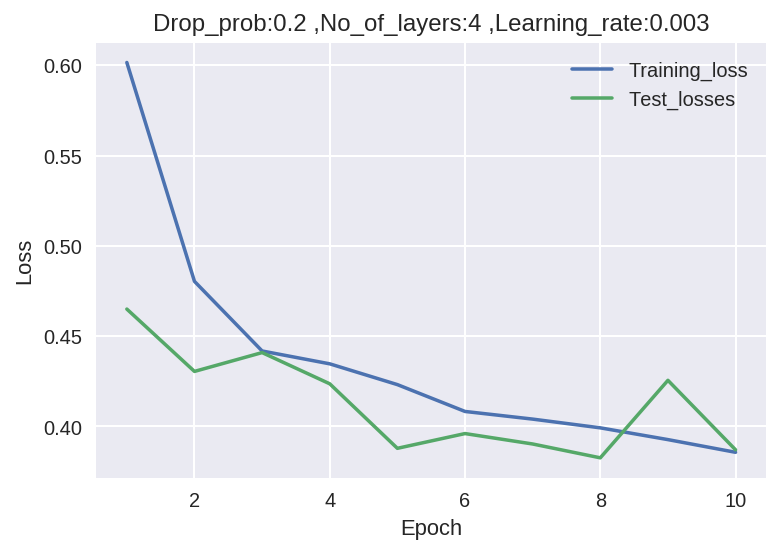

-------------------For Learning rate:0.003 ,No of layers:4 ,Dropout value:0.5--------------------
Epoch: 1/10..  Training Loss: 0.856..  Test Loss: 0.556..  Test Accuracy: 0.782
Epoch: 2/10..  Training Loss: 0.710..  Test Loss: 0.542..  Test Accuracy: 0.802
Epoch: 3/10..  Training Loss: 0.669..  Test Loss: 0.517..  Test Accuracy: 0.812
Epoch: 4/10..  Training Loss: 0.655..  Test Loss: 0.491..  Test Accuracy: 0.824
Epoch: 5/10..  Training Loss: 0.651..  Test Loss: 0.498..  Test Accuracy: 0.818
Epoch: 6/10..  Training Loss: 0.637..  Test Loss: 0.482..  Test Accuracy: 0.827
Epoch: 7/10..  Training Loss: 0.640..  Test Loss: 0.520..  Test Accuracy: 0.816
Epoch: 8/10..  Training Loss: 0.632..  Test Loss: 0.506..  Test Accuracy: 0.825
Epoch: 9/10..  Training Loss: 0.627..  Test Loss: 0.473..  Test Accuracy: 0.830
Epoch: 10/10..  Training Loss: 0.621..  Test Loss: 0.474..  Test Accuracy: 0.838


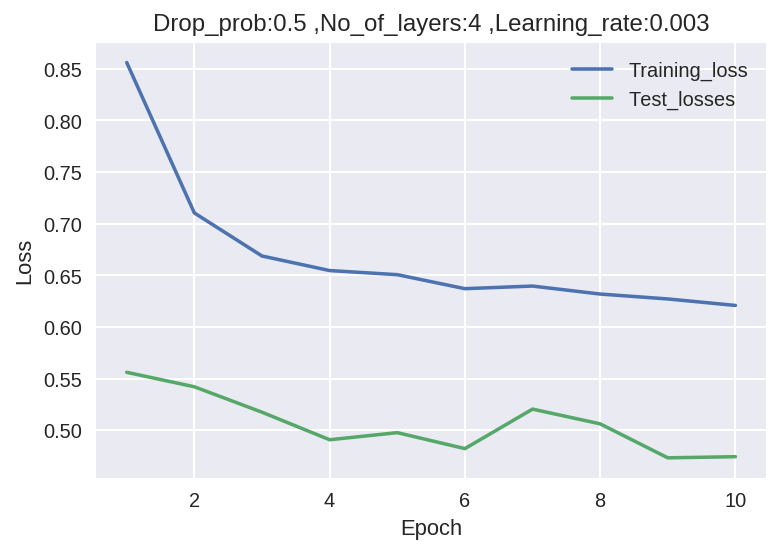

-------------------For Learning rate:0.007 ,No of layers:3 ,Dropout value:0.2--------------------
Epoch: 1/10..  Training Loss: 0.641..  Test Loss: 0.546..  Test Accuracy: 0.800
Epoch: 2/10..  Training Loss: 0.558..  Test Loss: 0.496..  Test Accuracy: 0.820
Epoch: 3/10..  Training Loss: 0.537..  Test Loss: 0.533..  Test Accuracy: 0.814
Epoch: 4/10..  Training Loss: 0.520..  Test Loss: 0.466..  Test Accuracy: 0.840
Epoch: 5/10..  Training Loss: 0.506..  Test Loss: 0.465..  Test Accuracy: 0.835
Epoch: 6/10..  Training Loss: 0.502..  Test Loss: 0.451..  Test Accuracy: 0.839
Epoch: 7/10..  Training Loss: 0.508..  Test Loss: 0.468..  Test Accuracy: 0.844
Epoch: 8/10..  Training Loss: 0.485..  Test Loss: 0.462..  Test Accuracy: 0.840
Epoch: 9/10..  Training Loss: 0.498..  Test Loss: 0.440..  Test Accuracy: 0.845
Epoch: 10/10..  Training Loss: 0.482..  Test Loss: 0.439..  Test Accuracy: 0.846


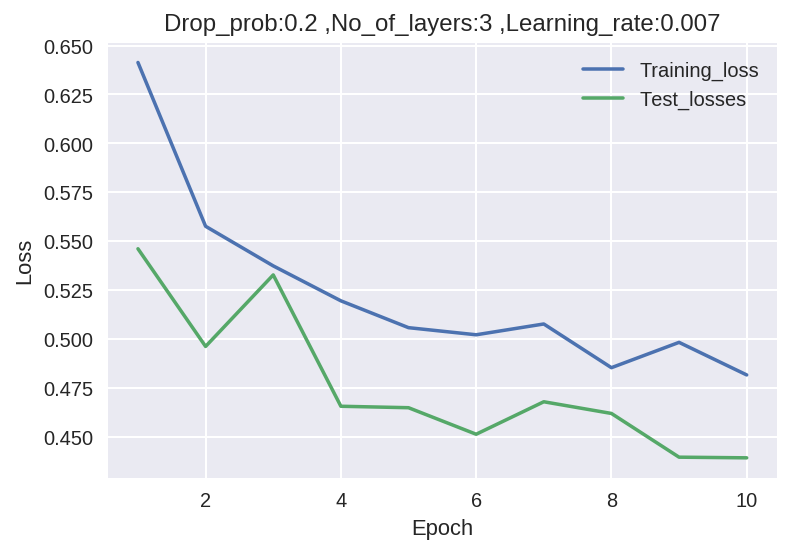

-------------------For Learning rate:0.007 ,No of layers:3 ,Dropout value:0.5--------------------
Epoch: 1/10..  Training Loss: 0.917..  Test Loss: 0.614..  Test Accuracy: 0.783
Epoch: 2/10..  Training Loss: 0.843..  Test Loss: 0.604..  Test Accuracy: 0.787
Epoch: 3/10..  Training Loss: 0.823..  Test Loss: 0.598..  Test Accuracy: 0.792
Epoch: 4/10..  Training Loss: 0.806..  Test Loss: 0.604..  Test Accuracy: 0.793
Epoch: 5/10..  Training Loss: 0.805..  Test Loss: 0.611..  Test Accuracy: 0.785
Epoch: 6/10..  Training Loss: 0.810..  Test Loss: 0.615..  Test Accuracy: 0.789
Epoch: 7/10..  Training Loss: 0.813..  Test Loss: 0.535..  Test Accuracy: 0.817
Epoch: 8/10..  Training Loss: 0.761..  Test Loss: 0.538..  Test Accuracy: 0.819
Epoch: 9/10..  Training Loss: 0.810..  Test Loss: 0.571..  Test Accuracy: 0.816
Epoch: 10/10..  Training Loss: 0.784..  Test Loss: 0.565..  Test Accuracy: 0.824


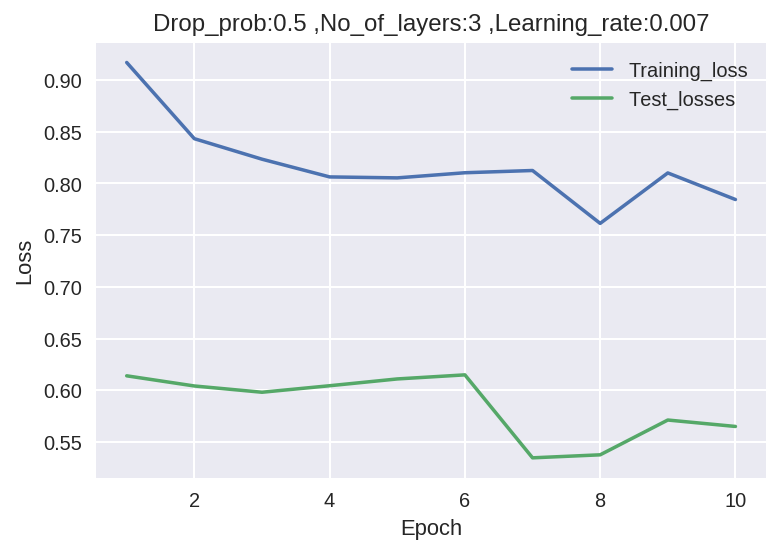

-------------------For Learning rate:0.007 ,No of layers:4 ,Dropout value:0.2--------------------
Epoch: 1/10..  Training Loss: 0.707..  Test Loss: 0.568..  Test Accuracy: 0.793
Epoch: 2/10..  Training Loss: 0.597..  Test Loss: 0.524..  Test Accuracy: 0.823
Epoch: 3/10..  Training Loss: 0.590..  Test Loss: 0.500..  Test Accuracy: 0.822
Epoch: 4/10..  Training Loss: 0.586..  Test Loss: 0.534..  Test Accuracy: 0.816
Epoch: 5/10..  Training Loss: 0.588..  Test Loss: 0.524..  Test Accuracy: 0.822
Epoch: 6/10..  Training Loss: 0.573..  Test Loss: 0.523..  Test Accuracy: 0.824
Epoch: 7/10..  Training Loss: 0.578..  Test Loss: 0.490..  Test Accuracy: 0.839
Epoch: 8/10..  Training Loss: 0.570..  Test Loss: 0.480..  Test Accuracy: 0.832
Epoch: 9/10..  Training Loss: 0.569..  Test Loss: 0.490..  Test Accuracy: 0.840
Epoch: 10/10..  Training Loss: 0.585..  Test Loss: 0.521..  Test Accuracy: 0.832


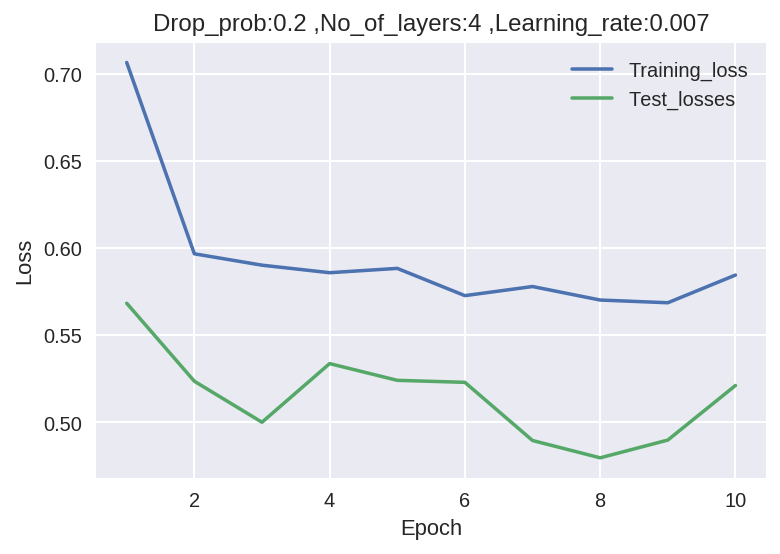

-------------------For Learning rate:0.007 ,No of layers:4 ,Dropout value:0.5--------------------
Epoch: 1/10..  Training Loss: 1.091..  Test Loss: 0.740..  Test Accuracy: 0.713
Epoch: 2/10..  Training Loss: 1.029..  Test Loss: 0.717..  Test Accuracy: 0.716
Epoch: 3/10..  Training Loss: 1.023..  Test Loss: 0.691..  Test Accuracy: 0.763
Epoch: 4/10..  Training Loss: 1.034..  Test Loss: 0.717..  Test Accuracy: 0.764
Epoch: 5/10..  Training Loss: 1.046..  Test Loss: 0.762..  Test Accuracy: 0.738
Epoch: 6/10..  Training Loss: 1.052..  Test Loss: 0.742..  Test Accuracy: 0.710
Epoch: 7/10..  Training Loss: 1.016..  Test Loss: 0.650..  Test Accuracy: 0.770
Epoch: 8/10..  Training Loss: 1.022..  Test Loss: 0.697..  Test Accuracy: 0.753
Epoch: 9/10..  Training Loss: 1.066..  Test Loss: 0.697..  Test Accuracy: 0.752
Epoch: 10/10..  Training Loss: 1.052..  Test Loss: 0.690..  Test Accuracy: 0.759


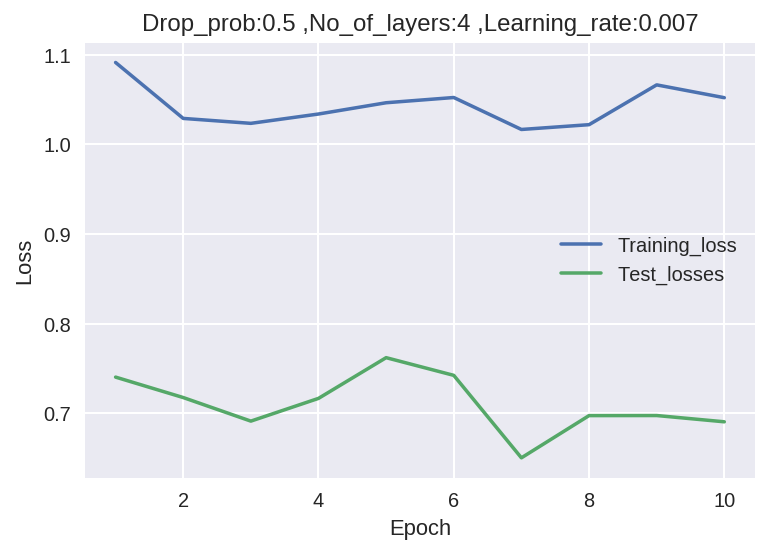

-------------------For Learning rate:0.01 ,No of layers:3 ,Dropout value:0.2--------------------
Epoch: 1/10..  Training Loss: 0.716..  Test Loss: 0.606..  Test Accuracy: 0.794
Epoch: 2/10..  Training Loss: 0.622..  Test Loss: 0.512..  Test Accuracy: 0.814
Epoch: 3/10..  Training Loss: 0.612..  Test Loss: 0.515..  Test Accuracy: 0.829
Epoch: 4/10..  Training Loss: 0.607..  Test Loss: 0.505..  Test Accuracy: 0.818
Epoch: 5/10..  Training Loss: 0.599..  Test Loss: 0.516..  Test Accuracy: 0.825
Epoch: 6/10..  Training Loss: 0.589..  Test Loss: 0.518..  Test Accuracy: 0.830
Epoch: 7/10..  Training Loss: 0.581..  Test Loss: 0.503..  Test Accuracy: 0.827
Epoch: 8/10..  Training Loss: 0.574..  Test Loss: 0.561..  Test Accuracy: 0.805
Epoch: 9/10..  Training Loss: 0.576..  Test Loss: 0.495..  Test Accuracy: 0.831
Epoch: 10/10..  Training Loss: 0.576..  Test Loss: 0.472..  Test Accuracy: 0.844


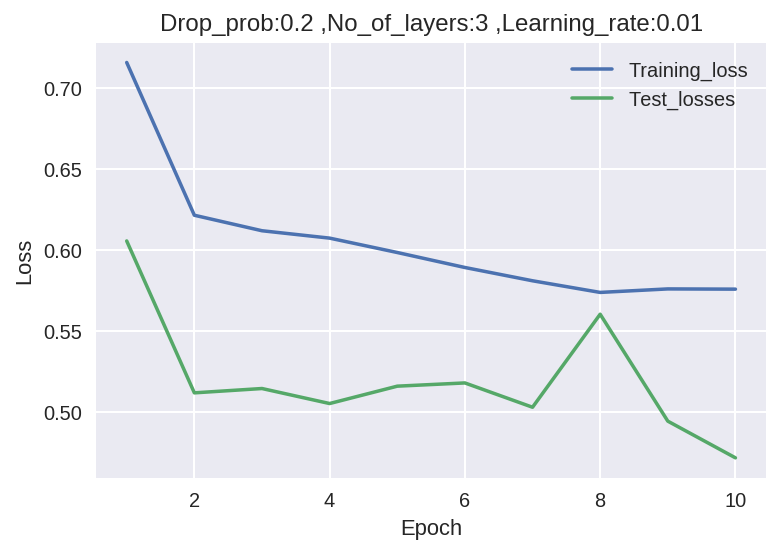

-------------------For Learning rate:0.01 ,No of layers:3 ,Dropout value:0.5--------------------
Epoch: 1/10..  Training Loss: 1.098..  Test Loss: 0.745..  Test Accuracy: 0.724
Epoch: 2/10..  Training Loss: 1.037..  Test Loss: 0.695..  Test Accuracy: 0.760
Epoch: 3/10..  Training Loss: 1.058..  Test Loss: 0.652..  Test Accuracy: 0.769
Epoch: 4/10..  Training Loss: 1.030..  Test Loss: 0.674..  Test Accuracy: 0.757
Epoch: 5/10..  Training Loss: 1.031..  Test Loss: 0.690..  Test Accuracy: 0.749
Epoch: 6/10..  Training Loss: 1.022..  Test Loss: 0.705..  Test Accuracy: 0.761
Epoch: 7/10..  Training Loss: 1.038..  Test Loss: 0.698..  Test Accuracy: 0.751
Epoch: 8/10..  Training Loss: 1.063..  Test Loss: 0.740..  Test Accuracy: 0.737
Epoch: 9/10..  Training Loss: 1.029..  Test Loss: 0.850..  Test Accuracy: 0.699
Epoch: 10/10..  Training Loss: 1.086..  Test Loss: 0.751..  Test Accuracy: 0.745


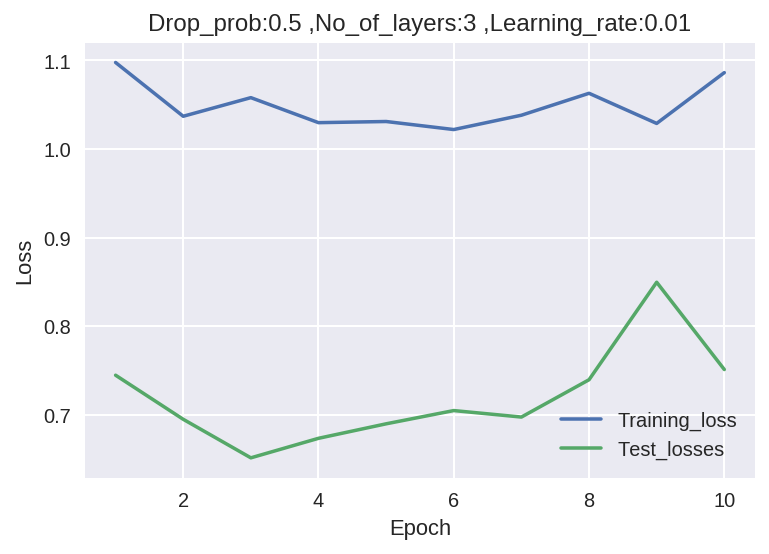

-------------------For Learning rate:0.01 ,No of layers:4 ,Dropout value:0.2--------------------
Epoch: 1/10..  Training Loss: 0.795..  Test Loss: 0.664..  Test Accuracy: 0.765
Epoch: 2/10..  Training Loss: 0.720..  Test Loss: 0.573..  Test Accuracy: 0.812
Epoch: 3/10..  Training Loss: 0.718..  Test Loss: 0.562..  Test Accuracy: 0.814
Epoch: 4/10..  Training Loss: 0.749..  Test Loss: 0.573..  Test Accuracy: 0.801
Epoch: 5/10..  Training Loss: 0.751..  Test Loss: 0.591..  Test Accuracy: 0.803
Epoch: 6/10..  Training Loss: 0.787..  Test Loss: 0.615..  Test Accuracy: 0.789
Epoch: 7/10..  Training Loss: 0.727..  Test Loss: 0.618..  Test Accuracy: 0.793
Epoch: 8/10..  Training Loss: 0.730..  Test Loss: 0.561..  Test Accuracy: 0.817
Epoch: 9/10..  Training Loss: 0.726..  Test Loss: 0.560..  Test Accuracy: 0.801
Epoch: 10/10..  Training Loss: 0.746..  Test Loss: 0.577..  Test Accuracy: 0.811


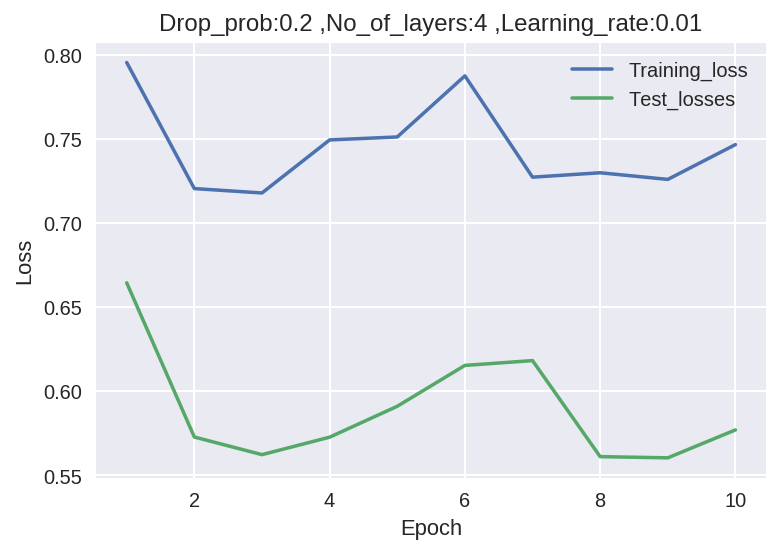

-------------------For Learning rate:0.01 ,No of layers:4 ,Dropout value:0.5--------------------
Epoch: 1/10..  Training Loss: 1.306..  Test Loss: 0.931..  Test Accuracy: 0.652
Epoch: 2/10..  Training Loss: 1.329..  Test Loss: 0.817..  Test Accuracy: 0.692
Epoch: 3/10..  Training Loss: 1.383..  Test Loss: 0.958..  Test Accuracy: 0.647
Epoch: 4/10..  Training Loss: 1.463..  Test Loss: 1.008..  Test Accuracy: 0.590
Epoch: 5/10..  Training Loss: 1.590..  Test Loss: 1.121..  Test Accuracy: 0.595
Epoch: 6/10..  Training Loss: 1.536..  Test Loss: 1.283..  Test Accuracy: 0.466
Epoch: 7/10..  Training Loss: 1.664..  Test Loss: 1.214..  Test Accuracy: 0.487
Epoch: 8/10..  Training Loss: 1.559..  Test Loss: 1.346..  Test Accuracy: 0.438
Epoch: 9/10..  Training Loss: 1.630..  Test Loss: 1.382..  Test Accuracy: 0.470
Epoch: 10/10..  Training Loss: 1.603..  Test Loss: 1.291..  Test Accuracy: 0.462


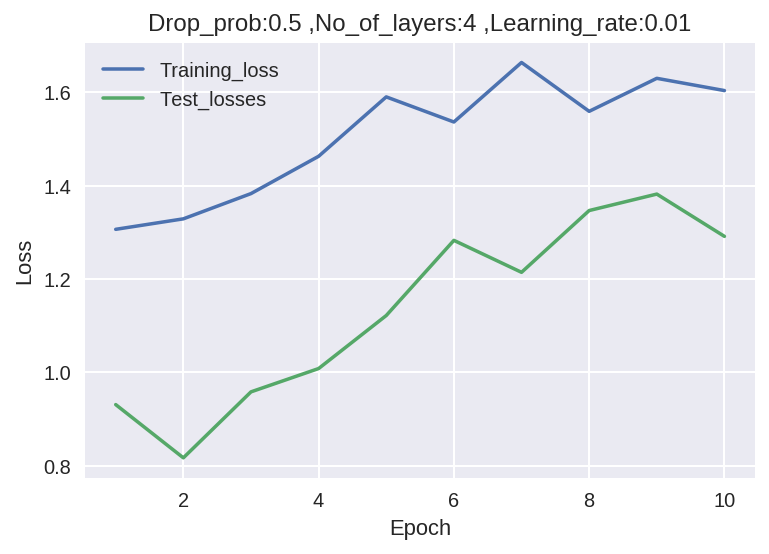

-------------------For Learning rate:0.03 ,No of layers:3 ,Dropout value:0.2--------------------
Epoch: 1/10..  Training Loss: 1.361..  Test Loss: 1.177..  Test Accuracy: 0.544
Epoch: 2/10..  Training Loss: 1.321..  Test Loss: 1.420..  Test Accuracy: 0.600
Epoch: 3/10..  Training Loss: 1.840..  Test Loss: 1.542..  Test Accuracy: 0.386
Epoch: 4/10..  Training Loss: 1.655..  Test Loss: 1.401..  Test Accuracy: 0.460
Epoch: 5/10..  Training Loss: 1.631..  Test Loss: 1.325..  Test Accuracy: 0.465
Epoch: 6/10..  Training Loss: 1.659..  Test Loss: 1.380..  Test Accuracy: 0.439
Epoch: 7/10..  Training Loss: 1.606..  Test Loss: 1.384..  Test Accuracy: 0.389
Epoch: 8/10..  Training Loss: 1.628..  Test Loss: 1.488..  Test Accuracy: 0.316
Epoch: 9/10..  Training Loss: 1.769..  Test Loss: 1.572..  Test Accuracy: 0.326
Epoch: 10/10..  Training Loss: 1.673..  Test Loss: 1.622..  Test Accuracy: 0.257


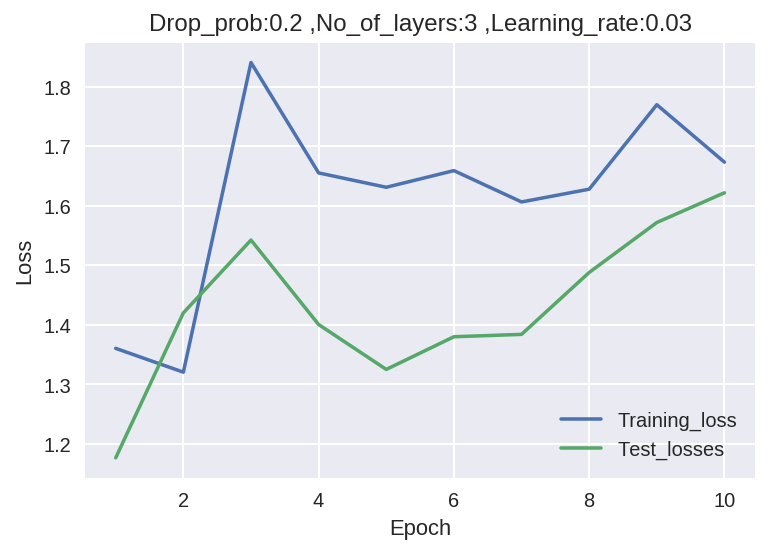

-------------------For Learning rate:0.03 ,No of layers:3 ,Dropout value:0.5--------------------
Epoch: 1/10..  Training Loss: 2.046..  Test Loss: 1.793..  Test Accuracy: 0.329
Epoch: 2/10..  Training Loss: 2.098..  Test Loss: 1.895..  Test Accuracy: 0.222
Epoch: 3/10..  Training Loss: 2.132..  Test Loss: 1.665..  Test Accuracy: 0.313
Epoch: 4/10..  Training Loss: 2.208..  Test Loss: 2.268..  Test Accuracy: 0.113
Epoch: 5/10..  Training Loss: 2.166..  Test Loss: 1.894..  Test Accuracy: 0.191
Epoch: 6/10..  Training Loss: 2.033..  Test Loss: 1.989..  Test Accuracy: 0.188
Epoch: 7/10..  Training Loss: 2.037..  Test Loss: 1.841..  Test Accuracy: 0.190
Epoch: 8/10..  Training Loss: 1.963..  Test Loss: 1.820..  Test Accuracy: 0.194
Epoch: 9/10..  Training Loss: 1.986..  Test Loss: 1.985..  Test Accuracy: 0.133
Epoch: 10/10..  Training Loss: 2.066..  Test Loss: 1.816..  Test Accuracy: 0.200


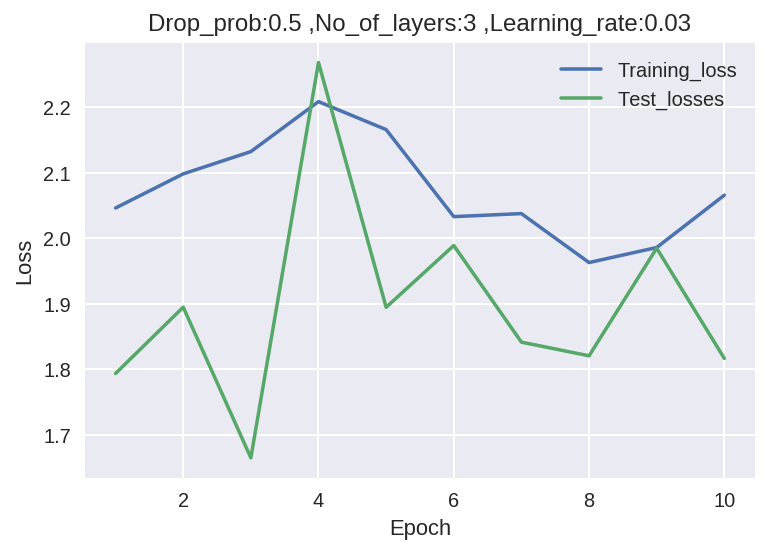

-------------------For Learning rate:0.03 ,No of layers:4 ,Dropout value:0.2--------------------
Epoch: 1/10..  Training Loss: 1.655..  Test Loss: 1.400..  Test Accuracy: 0.386
Epoch: 2/10..  Training Loss: 1.756..  Test Loss: 2.306..  Test Accuracy: 0.100
Epoch: 3/10..  Training Loss: 2.303..  Test Loss: 2.303..  Test Accuracy: 0.100
Epoch: 4/10..  Training Loss: 2.300..  Test Loss: 2.304..  Test Accuracy: 0.100
Epoch: 5/10..  Training Loss: 2.301..  Test Loss: 2.305..  Test Accuracy: 0.100
Epoch: 6/10..  Training Loss: 2.300..  Test Loss: 2.308..  Test Accuracy: 0.100
Epoch: 7/10..  Training Loss: 2.305..  Test Loss: 2.304..  Test Accuracy: 0.100
Epoch: 8/10..  Training Loss: 2.308..  Test Loss: 2.305..  Test Accuracy: 0.100
Epoch: 9/10..  Training Loss: 2.304..  Test Loss: 2.307..  Test Accuracy: 0.100
Epoch: 10/10..  Training Loss: 2.305..  Test Loss: 2.303..  Test Accuracy: 0.100


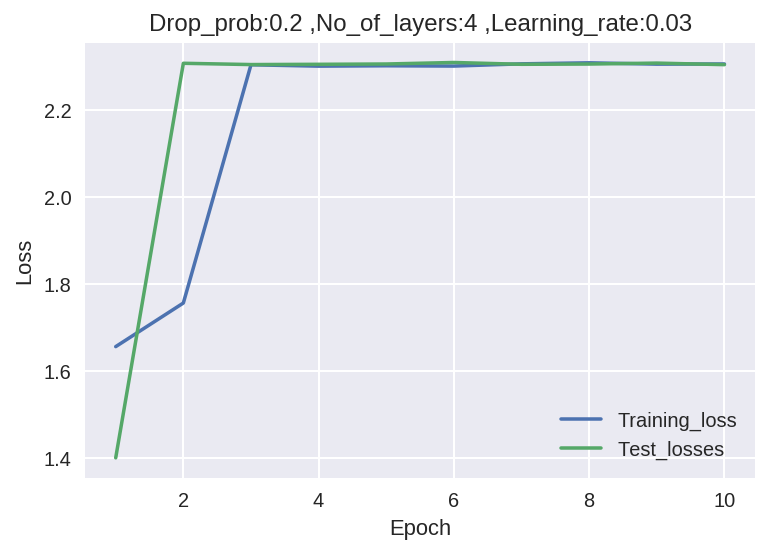

-------------------For Learning rate:0.03 ,No of layers:4 ,Dropout value:0.5--------------------
Epoch: 1/10..  Training Loss: 2.423..  Test Loss: 2.304..  Test Accuracy: 0.100
Epoch: 2/10..  Training Loss: 2.324..  Test Loss: 2.306..  Test Accuracy: 0.100
Epoch: 3/10..  Training Loss: 2.335..  Test Loss: 2.304..  Test Accuracy: 0.100
Epoch: 4/10..  Training Loss: 2.424..  Test Loss: 2.306..  Test Accuracy: 0.100
Epoch: 5/10..  Training Loss: 2.317..  Test Loss: 2.306..  Test Accuracy: 0.100
Epoch: 6/10..  Training Loss: 2.317..  Test Loss: 2.307..  Test Accuracy: 0.100
Epoch: 7/10..  Training Loss: 2.310..  Test Loss: 2.304..  Test Accuracy: 0.100
Epoch: 8/10..  Training Loss: 2.309..  Test Loss: 2.308..  Test Accuracy: 0.100
Epoch: 9/10..  Training Loss: 2.319..  Test Loss: 2.306..  Test Accuracy: 0.101
Epoch: 10/10..  Training Loss: 2.307..  Test Loss: 2.306..  Test Accuracy: 0.100


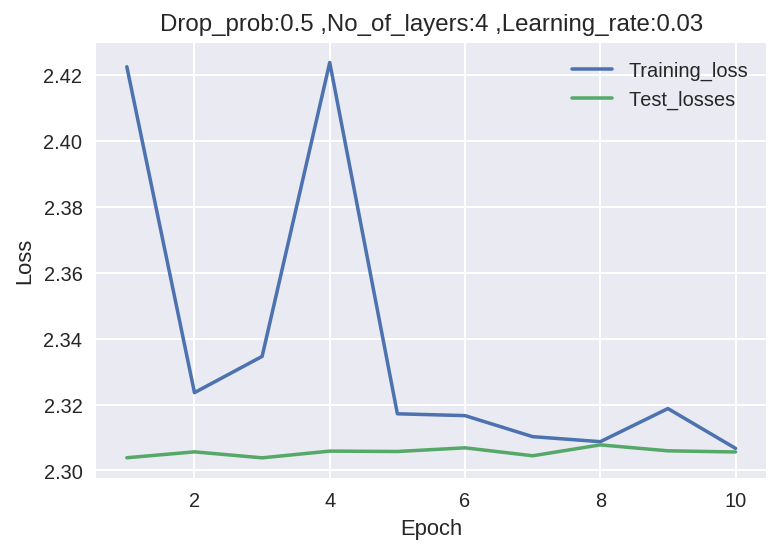

-------------------For Learning rate:0.06 ,No of layers:3 ,Dropout value:0.2--------------------
Epoch: 1/10..  Training Loss: 2.480..  Test Loss: 2.306..  Test Accuracy: 0.100
Epoch: 2/10..  Training Loss: 2.311..  Test Loss: 2.307..  Test Accuracy: 0.100
Epoch: 3/10..  Training Loss: 2.334..  Test Loss: 2.307..  Test Accuracy: 0.100
Epoch: 4/10..  Training Loss: 2.308..  Test Loss: 2.308..  Test Accuracy: 0.100
Epoch: 5/10..  Training Loss: 2.308..  Test Loss: 2.311..  Test Accuracy: 0.100
Epoch: 6/10..  Training Loss: 2.326..  Test Loss: 2.307..  Test Accuracy: 0.100
Epoch: 7/10..  Training Loss: 2.310..  Test Loss: 2.309..  Test Accuracy: 0.100
Epoch: 8/10..  Training Loss: 2.490..  Test Loss: 2.311..  Test Accuracy: 0.101
Epoch: 9/10..  Training Loss: 2.325..  Test Loss: 2.310..  Test Accuracy: 0.100
Epoch: 10/10..  Training Loss: 2.308..  Test Loss: 2.306..  Test Accuracy: 0.100


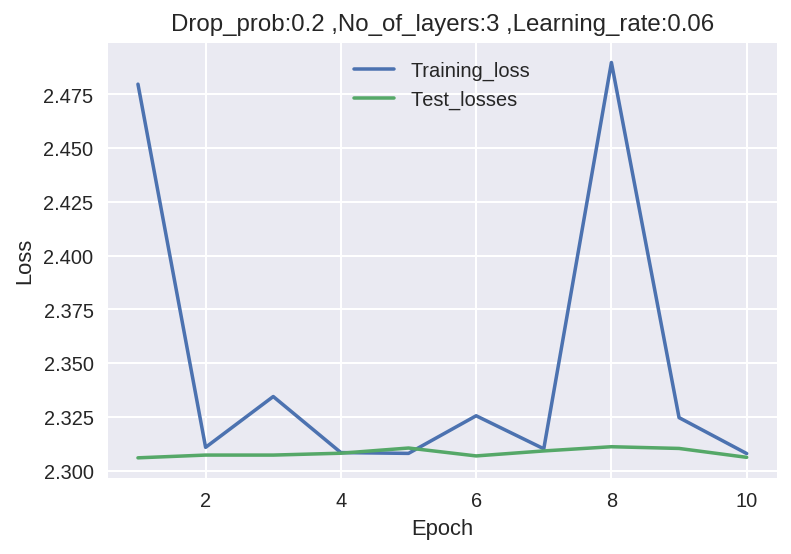

-------------------For Learning rate:0.06 ,No of layers:3 ,Dropout value:0.5--------------------
Epoch: 1/10..  Training Loss: 2.784..  Test Loss: 2.308..  Test Accuracy: 0.100
Epoch: 2/10..  Training Loss: 3.652..  Test Loss: 2.309..  Test Accuracy: 0.100
Epoch: 3/10..  Training Loss: 2.411..  Test Loss: 2.309..  Test Accuracy: 0.101
Epoch: 4/10..  Training Loss: 2.494..  Test Loss: 2.313..  Test Accuracy: 0.100
Epoch: 5/10..  Training Loss: 2.459..  Test Loss: 2.309..  Test Accuracy: 0.100
Epoch: 6/10..  Training Loss: 2.308..  Test Loss: 2.310..  Test Accuracy: 0.100
Epoch: 7/10..  Training Loss: 2.328..  Test Loss: 2.309..  Test Accuracy: 0.100
Epoch: 8/10..  Training Loss: 2.573..  Test Loss: 2.305..  Test Accuracy: 0.100
Epoch: 9/10..  Training Loss: 2.308..  Test Loss: 2.306..  Test Accuracy: 0.100
Epoch: 10/10..  Training Loss: 2.326..  Test Loss: 2.309..  Test Accuracy: 0.100


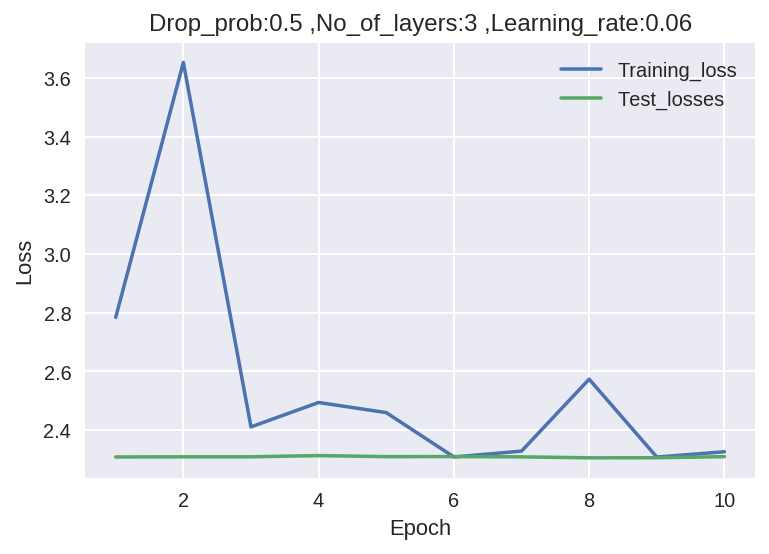

-------------------For Learning rate:0.06 ,No of layers:4 ,Dropout value:0.2--------------------
Epoch: 1/10..  Training Loss: 2.466..  Test Loss: 2.308..  Test Accuracy: 0.100
Epoch: 2/10..  Training Loss: 2.308..  Test Loss: 2.306..  Test Accuracy: 0.100
Epoch: 3/10..  Training Loss: 2.307..  Test Loss: 2.310..  Test Accuracy: 0.100
Epoch: 4/10..  Training Loss: 2.309..  Test Loss: 2.307..  Test Accuracy: 0.100
Epoch: 5/10..  Training Loss: 2.308..  Test Loss: 2.308..  Test Accuracy: 0.100
Epoch: 6/10..  Training Loss: 2.330..  Test Loss: 2.309..  Test Accuracy: 0.100
Epoch: 7/10..  Training Loss: 2.312..  Test Loss: 2.306..  Test Accuracy: 0.100
Epoch: 8/10..  Training Loss: 2.308..  Test Loss: 2.304..  Test Accuracy: 0.100
Epoch: 9/10..  Training Loss: 2.308..  Test Loss: 2.307..  Test Accuracy: 0.100
Epoch: 10/10..  Training Loss: 2.308..  Test Loss: 2.311..  Test Accuracy: 0.100


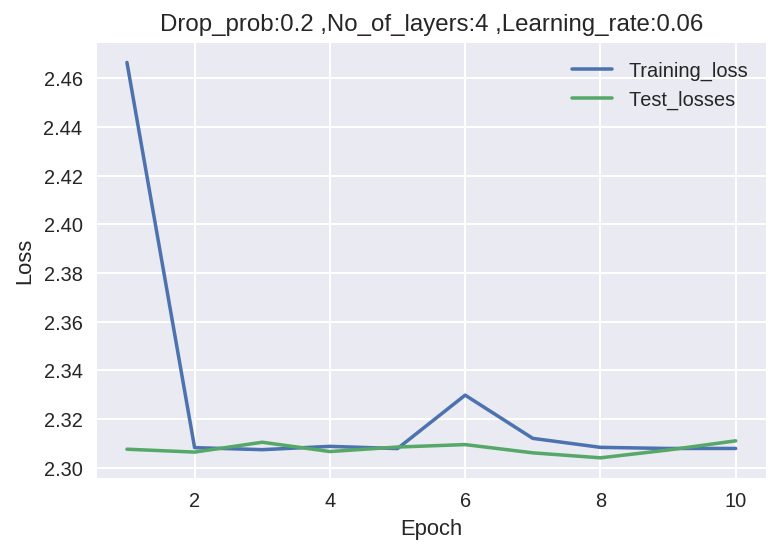

-------------------For Learning rate:0.06 ,No of layers:4 ,Dropout value:0.5--------------------
Epoch: 1/10..  Training Loss: 2.552..  Test Loss: 2.305..  Test Accuracy: 0.100
Epoch: 2/10..  Training Loss: 2.803..  Test Loss: 2.305..  Test Accuracy: 0.100
Epoch: 3/10..  Training Loss: 2.315..  Test Loss: 2.307..  Test Accuracy: 0.100
Epoch: 4/10..  Training Loss: 2.349..  Test Loss: 2.306..  Test Accuracy: 0.100
Epoch: 5/10..  Training Loss: 2.383..  Test Loss: 2.311..  Test Accuracy: 0.100
Epoch: 6/10..  Training Loss: 2.308..  Test Loss: 2.307..  Test Accuracy: 0.100
Epoch: 7/10..  Training Loss: 2.308..  Test Loss: 2.304..  Test Accuracy: 0.100
Epoch: 8/10..  Training Loss: 2.311..  Test Loss: 2.309..  Test Accuracy: 0.100
Epoch: 9/10..  Training Loss: 2.308..  Test Loss: 2.306..  Test Accuracy: 0.100
Epoch: 10/10..  Training Loss: 2.308..  Test Loss: 2.306..  Test Accuracy: 0.100


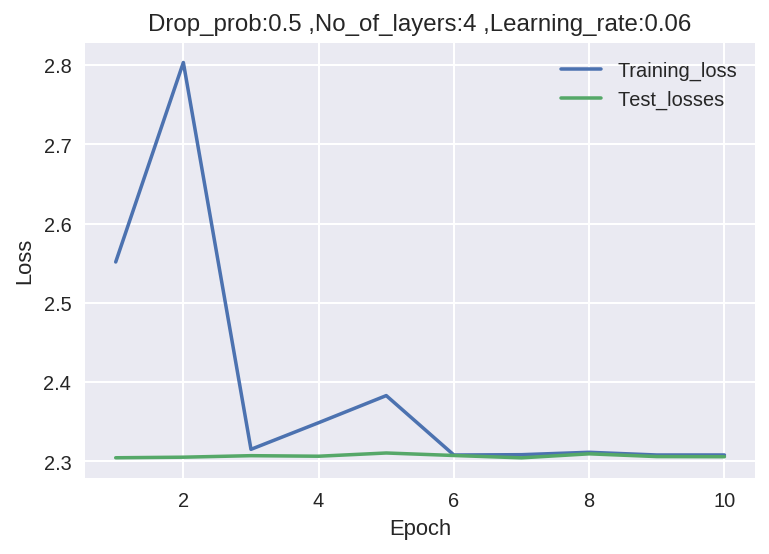

-------------------For Learning rate:0.1 ,No of layers:3 ,Dropout value:0.2--------------------
Epoch: 1/10..  Training Loss: 3.075..  Test Loss: 2.306..  Test Accuracy: 0.100
Epoch: 2/10..  Training Loss: 2.331..  Test Loss: 2.319..  Test Accuracy: 0.100
Epoch: 3/10..  Training Loss: 2.321..  Test Loss: 2.309..  Test Accuracy: 0.100
Epoch: 4/10..  Training Loss: 2.319..  Test Loss: 2.313..  Test Accuracy: 0.100
Epoch: 5/10..  Training Loss: 2.312..  Test Loss: 2.307..  Test Accuracy: 0.100
Epoch: 6/10..  Training Loss: 2.312..  Test Loss: 2.319..  Test Accuracy: 0.100
Epoch: 7/10..  Training Loss: 2.313..  Test Loss: 2.308..  Test Accuracy: 0.100
Epoch: 8/10..  Training Loss: 2.311..  Test Loss: 2.315..  Test Accuracy: 0.100
Epoch: 9/10..  Training Loss: 2.312..  Test Loss: 2.312..  Test Accuracy: 0.101
Epoch: 10/10..  Training Loss: 2.311..  Test Loss: 2.308..  Test Accuracy: 0.100


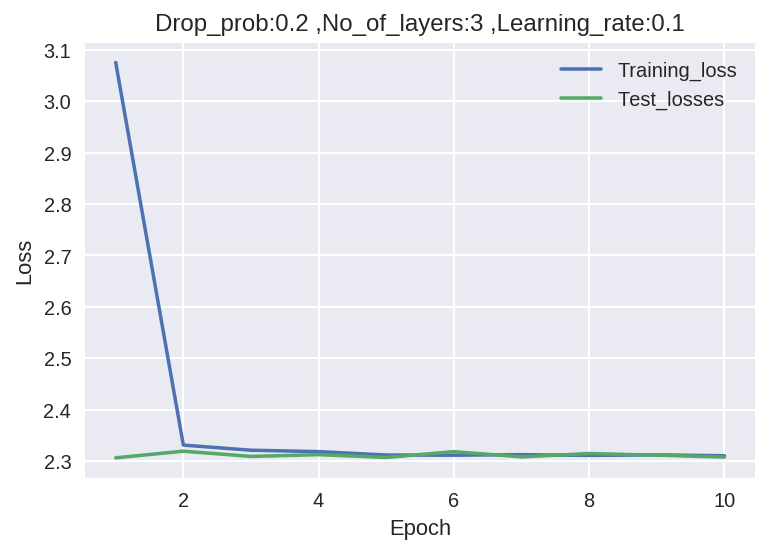

-------------------For Learning rate:0.1 ,No of layers:3 ,Dropout value:0.5--------------------
Epoch: 1/10..  Training Loss: 3.207..  Test Loss: 2.314..  Test Accuracy: 0.100
Epoch: 2/10..  Training Loss: 2.421..  Test Loss: 2.305..  Test Accuracy: 0.100
Epoch: 3/10..  Training Loss: 2.947..  Test Loss: 2.315..  Test Accuracy: 0.100
Epoch: 4/10..  Training Loss: 2.751..  Test Loss: 2.311..  Test Accuracy: 0.100
Epoch: 5/10..  Training Loss: 2.374..  Test Loss: 2.307..  Test Accuracy: 0.100
Epoch: 6/10..  Training Loss: 2.311..  Test Loss: 2.312..  Test Accuracy: 0.100
Epoch: 7/10..  Training Loss: 2.345..  Test Loss: 2.314..  Test Accuracy: 0.100
Epoch: 8/10..  Training Loss: 2.669..  Test Loss: 2.312..  Test Accuracy: 0.100
Epoch: 9/10..  Training Loss: 2.311..  Test Loss: 2.310..  Test Accuracy: 0.100
Epoch: 10/10..  Training Loss: 2.311..  Test Loss: 2.305..  Test Accuracy: 0.100


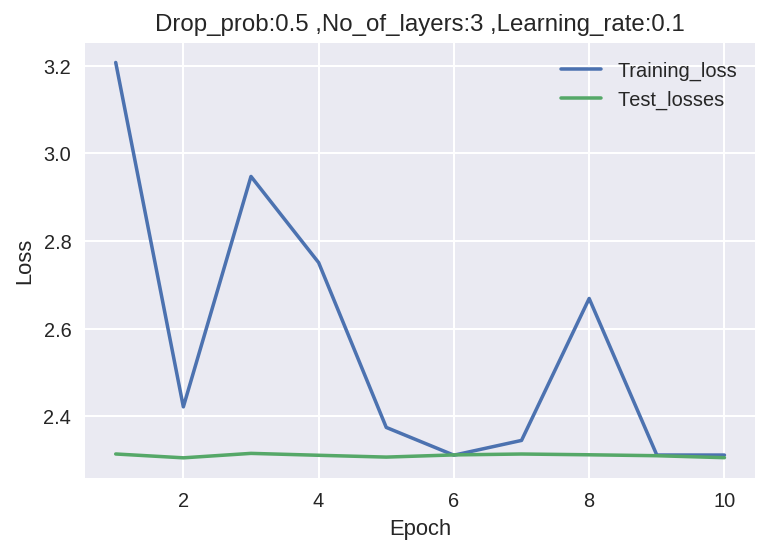

-------------------For Learning rate:0.1 ,No of layers:4 ,Dropout value:0.2--------------------
Epoch: 1/10..  Training Loss: 4.029..  Test Loss: 2.313..  Test Accuracy: 0.100
Epoch: 2/10..  Training Loss: 2.448..  Test Loss: 2.313..  Test Accuracy: 0.100
Epoch: 3/10..  Training Loss: 2.312..  Test Loss: 2.305..  Test Accuracy: 0.100
Epoch: 4/10..  Training Loss: 2.312..  Test Loss: 2.310..  Test Accuracy: 0.100
Epoch: 5/10..  Training Loss: 2.426..  Test Loss: 2.320..  Test Accuracy: 0.100
Epoch: 6/10..  Training Loss: 2.385..  Test Loss: 2.318..  Test Accuracy: 0.100
Epoch: 7/10..  Training Loss: 2.351..  Test Loss: 2.305..  Test Accuracy: 0.101
Epoch: 8/10..  Training Loss: 2.312..  Test Loss: 2.313..  Test Accuracy: 0.101
Epoch: 9/10..  Training Loss: 2.311..  Test Loss: 2.313..  Test Accuracy: 0.100
Epoch: 10/10..  Training Loss: 2.312..  Test Loss: 2.308..  Test Accuracy: 0.100


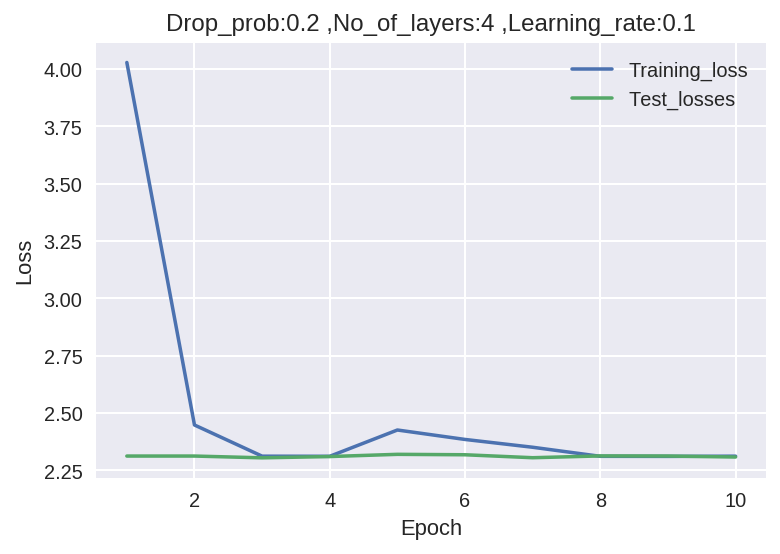

-------------------For Learning rate:0.1 ,No of layers:4 ,Dropout value:0.5--------------------
Epoch: 1/10..  Training Loss: 7.349..  Test Loss: 2.307..  Test Accuracy: 0.100
Epoch: 2/10..  Training Loss: 6.731..  Test Loss: 2.309..  Test Accuracy: 0.100
Epoch: 3/10..  Training Loss: 2.327..  Test Loss: 2.315..  Test Accuracy: 0.100
Epoch: 4/10..  Training Loss: 3.840..  Test Loss: 2.310..  Test Accuracy: 0.100
Epoch: 5/10..  Training Loss: 27.675..  Test Loss: 2.317..  Test Accuracy: 0.100
Epoch: 6/10..  Training Loss: 8.890..  Test Loss: 2.310..  Test Accuracy: 0.100
Epoch: 7/10..  Training Loss: 3.822..  Test Loss: 2.306..  Test Accuracy: 0.101
Epoch: 8/10..  Training Loss: 2.311..  Test Loss: 2.309..  Test Accuracy: 0.100
Epoch: 9/10..  Training Loss: 3.253..  Test Loss: 2.311..  Test Accuracy: 0.100
Epoch: 10/10..  Training Loss: 2.541..  Test Loss: 2.307..  Test Accuracy: 0.100


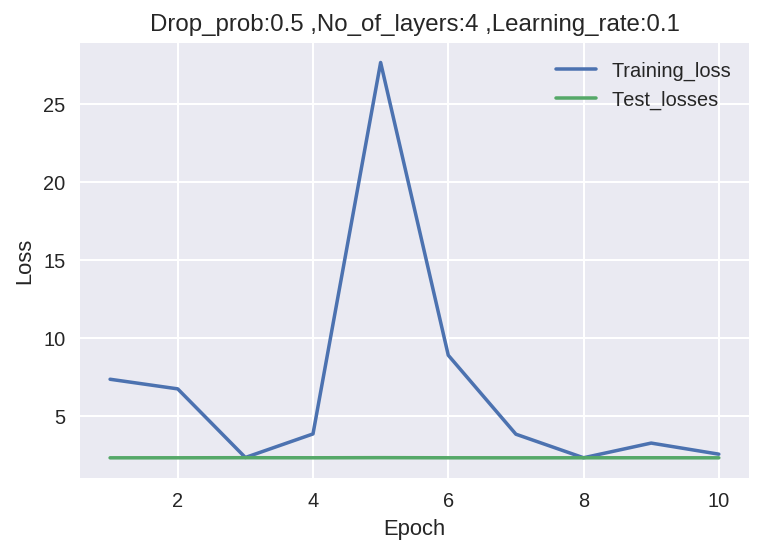

In [0]:
criterion=nn.NLLLoss()
epoch=10
x=-1
for lr in [0.001,0.003,0.007,0.01,0.03,0.06,0.1]:
  
  
  for lyr in [3,4]:
    
    for drop in [0.2,0.5]:
      print('-------------------For Learning rate:{} ,No of layers:{} ,Dropout value:{}--------------------'.format(lr,lyr,drop))
      model=Classifier(drop)
      x+=1
      data.iloc[x][0]=lr
      data.iloc[x][1]=lyr
      data.iloc[x][2]=drop
      optimizer=optim.Adam(model.parameters(),lr=lr)
      test_accuracy=0
      test_losses=[]
      train_losses=[]
      for e in range(epoch):
        running_loss=0
        for images,labels in trainloader:
          optimizer.zero_grad()
          log_ps=model(images,lyr)
          loss=criterion(log_ps,labels)
          running_loss+=loss
          loss.backward()
          optimizer.step()
        else:
          accuracy=0
          test_loss=0
          with torch.no_grad():
            model.eval()
            for images,labels in testloader:
              log_ps=model(images,lyr)
              test_loss+=criterion(log_ps,labels)
              
              ps=torch.exp(log_ps)
              top_p,top_class=ps.topk(1,dim=1)
              equals=top_class==labels.view(*top_class.shape)
              accuracy+=torch.mean(equals.type(torch.FloatTensor))
          model.train()
          train_losses.append(running_loss.item()/len(trainloader))
          test_losses.append(test_loss.item()/len(testloader))
          data.iloc[x][e+3]=accuracy.item()/len(testloader)
          test_accuracy+=accuracy.item()
          print("Epoch: {}/{}.. ".format(e+1, epoch),
            "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
            "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
            "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
      data.iloc[x][e+4]=(test_accuracy/len(testloader))/10
      plt.plot(range(1,epoch+1),train_losses,label='Training_loss')
      plt.plot(range(1,epoch+1),test_losses,label='Test_losses')
      plt.title('Drop_prob:{} ,No_of_layers:{} ,Learning_rate:{}'.format(drop,lyr,lr))
      plt.xlabel('Epoch')
      plt.ylabel('Loss')
      plt.savefig('Drop_prob:{} ,No_of_layers:{} ,Learning_rate:{}.png'.format(drop,lyr,lr))
      plt.legend()
      plt.show()
      
          
          
          
      

In [0]:
data['Std_dev']=data.loc[:,'Epoch1':'Epoch10'].std(axis=1)
data['Variance']=data.loc[:,'Epoch1':'Epoch10'].var(axis=1).round(6)

In [0]:
data

,Learning_rate,No_of_layer,Dropout_val,Epoch1,Epoch2,Epoch3,Epoch4,Epoch5,Epoch6,Epoch7,Epoch8,Epoch9,Epoch10,Mean_accuracy,Std_dev,Variance
0,0.001,3,0.2,0.841461,0.849522,0.86256,0.862361,0.871318,0.869725,0.873905,0.8751,0.876592,0.880275,0.866282,0.012478,0.000156
1,0.001,3,0.5,0.829319,0.840963,0.846338,0.848428,0.857982,0.859773,0.857982,0.859674,0.863356,0.86664,0.853045,0.011568,0.000134
2,0.001,4,0.2,0.837381,0.851513,0.860171,0.865247,0.870621,0.872114,0.87082,0.87291,0.877787,0.882464,0.866103,0.013346,0.000178
3,0.001,4,0.5,0.811803,0.832703,0.843551,0.839371,0.849522,0.849622,0.85211,0.85838,0.859674,0.854896,0.845163,0.014420,0.000208
4,0.003,3,0.2,0.833599,0.850816,0.841859,0.855792,0.858579,0.856887,0.855494,0.864252,0.869825,0.875,0.85621,0.012275,0.000151
5,0.003,3,0.5,0.815386,0.826433,0.836087,0.833798,0.839072,0.836982,0.848925,0.84365,0.845044,0.851314,0.837669,0.010779,0.000116
6,0.003,4,0.2,0.836684,0.843153,0.845442,0.842655,0.857584,0.861067,0.867337,0.867536,0.850816,0.863555,0.853583,0.011270,0.000127
7,0.003,4,0.5,0.782444,0.801851,0.811604,0.823945,0.817576,0.82713,0.815784,0.825239,0.829618,0.837679,0.817287,0.015844,0.000251
8,0.007,3,0.2,0.800159,0.820064,0.813694,0.83957,0.834693,0.838973,0.843949,0.83957,0.845143,0.84584,0.832166,0.015523,0.000241
9,0.007,3,0.5,0.783439,0.786724,0.791501,0.792795,0.785231,0.788814,0.817178,0.81867,0.816182,0.823646,0.800418,0.016265,0.000265


In [0]:
data=pd.read_csv('fashion1.csv',index=False)

In [0]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
results = ols('Mean_accuracy ~ C(Learning_rate)', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Mean_accuracy   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     96.52
Date:                Sun, 30 Dec 2018   Prob (F-statistic):           3.47e-14
Time:                        17:16:05   Log-Likelihood:                 37.317
No. Observations:                  28   AIC:                            -60.63
Df Residuals:                      21   BIC:                            -51.31
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.8576      0.037     23.276      0.000       0.781       0.934
C(Learning_rate)[T.0.003]                   -0.0165      0.052     -0.316      0.755      -0.125       0.092
C(Learning_rate)[T.0.006999999999999999]    -0.0575      0.052     -1.103      0.282      -0.166       0.051
C(Learning_rate)[T.0.01]                    -0.1283      0.052     -2.462      0.023      -0.237      -0.020
C(Learning_rate)[T.0.03]                    -0.6441      0.052    -12.361      0.000      -0.752      -0.536
C(Learning_rate)[T.0.06]                    -0.7577      0.052    -14.541      0.000      -0.866      -0.649
C(Learning_rate)[T.0.1]                     -0.7577      0.052    -14.540      0.000      -0.866      -0.649
==============================================================================
Omnibus:                        9.039   Durbin-Watson:                   2.806
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               16.266
Skew:                           0.238   Prob(JB):                     0.000294
Kurtosis:                       6.704   Cond. No.                         7.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Learning_rate),3.145147,6.0,96.524541,3.467159e-14
Residual,0.114044,21.0,NaN,NaN


In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data['Mean_accuracy'], data['Learning_rate'])
mc_results = mc.tukeyhsd()
print(mc_results)

            Multiple Comparison of Means - Tukey HSD,FWER=0.05           
       group1               group2        meandiff  lower   upper  reject
-------------------------------------------------------------------------
       0.001                0.003         -0.0165  -0.1859  0.1529 False 
       0.001         0.006999999999999999 -0.0575  -0.2269  0.1119 False 
       0.001                 0.01         -0.1283  -0.2977  0.0411 False 
       0.001                 0.03         -0.6441  -0.8135 -0.4747  True 
       0.001                 0.06         -0.7577  -0.9271 -0.5883  True 
       0.001                 0.1          -0.7577  -0.9271 -0.5883  True 
       0.003         0.006999999999999999  -0.041  -0.2104  0.1284 False 
       0.003                 0.01         -0.1118  -0.2812  0.0576 False 
       0.003                 0.03         -0.6277  -0.7971 -0.4583  True 
       0.003                 0.06         -0.7412  -0.9106 -0.5718  True 
       0.003                 0.1      

So we see in the test that generally the  model of learning rate in b/w {0.001,0.003,0.007,0.01} having comparable mean accurayc so we can't reject null hypothesis and also in b/w {0.03,0.06,0.1} having comparable  mean accuracy so also not reject null  hypothesis b/w them but if we compare other than this group then the mean accuracy is not comparable so we can reject it